In [ ]:
import datetime
from calculator import LoanContext
from calculator.rates import InterestContext, InflationContext
from calculator.loans.downpayments import DownPayments
from calculator.loans.indexedloan import IndexBasedLoan

lcontext = LoanContext(40000000, datetime.datetime.now(), 25)
icontext = InterestContext(2.94)
fcontext = InflationContext(10)
dpayments = DownPayments(lcontext, icontext)
a = IndexBasedLoan(dpayments, fcontext)
a.df['payments_base'] += 130
a.df

,date,cumulative_inflation,capital_base,payments_base,payments_extra,interests_base,instalments_base
0,2023-05-03 22:30:09.964691,0.008333,4.033333e+07,190138.915364,0,98816.666667,89621.927082
1,2023-06-03 22:30:09.964691,0.008333,4.024296e+07,190142.803503,0,98595.263164,89843.330585
2,2023-07-03 22:30:09.964691,0.008333,4.015237e+07,190146.710164,0,98373.312703,90065.281046
3,2023-08-03 22:30:09.964691,0.008333,4.006156e+07,190150.635519,0,98150.813932,90287.779817
4,2023-09-03 22:30:09.964691,0.008333,3.997052e+07,190154.579744,0,97927.765496,90510.828253
...,...,...,...,...,...,...,...
297,2048-02-03 22:30:09.964691,0.008333,7.929585e+05,265745.717794,0,1942.748294,186495.845455
298,2048-03-03 22:30:09.964691,0.008333,6.049085e+05,303696.227713,0,1482.025850,186956.567900
299,2048-04-03 22:30:09.964691,0.008333,4.163940e+05,417544.135952,0,1020.165228,187418.428521
300,2048-05-03 22:30:09.964691,0.008333,2.274137e+05,228100.885584,0,557.163619,187881.430130


In [ ]:
import numpy as np


def indexed_based_even_payment(capital, inflation, interest_rate, payment_idx, n_payments, extra_payment = 0):

    if payment_idx == 0:
        raise Exception("0-day payment not supported.")

    monthly_interest = interest_rate / 12
    monthly_interest_increase = 1 + monthly_interest
    payment_interest = monthly_interest_increase**(n_payments - payment_idx + 1)

    monthly_inflation = np.exp(np.log(1 + inflation) / 12) - 1
    inflated_capital = capital * (1 + monthly_inflation)

    if n_payments == payment_idx:
        payment = inflated_capital * (1 + monthly_interest)
    else:
        payment = inflated_capital * payment_interest * monthly_interest / (payment_interest - 1)
    interest = inflated_capital * monthly_interest
    installment = payment - interest
    capital_after = inflated_capital - installment - extra_payment

    return payment, interest, capital_after

indexed_based_even_payment(40000000, 10.0/100, 2.94/100, 1, 300)

(189941.22955786713, 98781.46576203256, 40227805.85336031)

In [ ]:
def indexed_based_fixed_installment(capital, inflation, interest_rate, payment_idx, n_payments, extra_payment = 0):

    if payment_idx == 0:
        raise Exception("0-day payment not supported.")

    monthly_interest = interest_rate / 12

    monthly_inflation = np.exp(np.log(1 + inflation) / 12) - 1
    inflated_capital = capital * (1 + monthly_inflation)

    installment = inflated_capital / (n_payments  - payment_idx + 1)
    interest = inflated_capital * monthly_interest
    payment = installment + interest
    capital_after = inflated_capital - installment - extra_payment

    return payment, interest, capital_after

indexed_based_fixed_installment(40000000, 10.0/100, 2.94/100, 1, 300)

(233178.01781921973, 98781.46576203256, 40184569.06509896)

In [ ]:
def indexed_based_even_payment(capital, inflation, interest_rate, payment_idx, n_payments, extra_payment = 0):

    if payment_idx == 0:
        raise Exception("0-day payment not supported.")

    monthly_interest = interest_rate / 12
    monthly_interest_increase = 1 + monthly_interest
    payment_interest = monthly_interest_increase**(n_payments - payment_idx + 1)

    monthly_inflation = np.exp(np.log(1 + inflation) / 12) - 1
    inflated_capital = capital * (1 + monthly_inflation)

    if n_payments == payment_idx:
        payment = inflated_capital * (1 + monthly_interest)
    else:
        payment = inflated_capital * payment_interest * monthly_interest / (payment_interest - 1)
    interest = inflated_capital * monthly_interest
    installment = payment - interest
    capital_after = inflated_capital - installment - extra_payment

    return payment, interest, capital_after

Loading housing_index data from cache.


,year,month,total,villas,apartment,adjusted,date,date_month,housing_index
0,1994,1,100.0,100.0,100.0,100.0,1994-01-01,1994-01-01,0.000000
1,1994,2,99.7,88.6,102.5,97.9,1994-02-01,1994-02-01,-0.021000
2,1994,3,102.0,96.6,103.6,100.5,1994-03-01,1994-03-01,0.026558
3,1994,4,100.8,94.5,102.7,99.3,1994-04-01,1994-04-01,-0.011940
4,1994,5,99.8,93.6,101.6,98.5,1994-05-01,1994-05-01,-0.008056
...,...,...,...,...,...,...,...,...,...
346,2022,11,957.3,974.8,953.6,896.5,2022-11-01,2022-11-01,-0.003114
347,2022,12,950.9,954.1,951.2,890.6,2022-12-01,2022-12-01,-0.006581
348,2023,1,946.4,947.0,947.4,886.4,2023-01-01,2023-01-01,-0.004716
349,2023,2,948.9,945.0,951.4,888.7,2023-02-01,2023-02-01,0.002595


<Axes: >

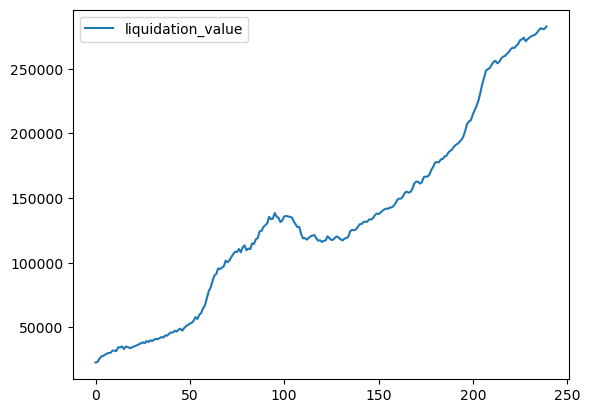

In [ ]:
import pandas as pd
from dateutil.relativedelta import relativedelta
import numpy as np


class LoanCalculator:

    @classmethod
    def monthly_inflation_rate(cls, inflation: float) -> float:
        return np.exp(np.log(1 + inflation) / 12) - 1

    @classmethod
    def monthly_inflation_interest(cls, inflation: float) -> float:
        return 1 + cls.monthly_inflation_rate(inflation)

    @classmethod
    def monthly_rate(cls, interest: float) -> float:
        return interest / 12

    @classmethod
    def monthly_interest(cls, interest: float) -> float:
        return 1 + cls.monthly_rate(interest)

    @classmethod
    def inflated_capital(cls, capital: float, inflation: float) -> float:
        return capital * cls.monthly_inflation_interest(inflation)

    @classmethod
    def adjusted_interest(cls, interest: float, payment_idx: int, n_payments: int) -> float:
        return cls.monthly_interest(interest) ** (n_payments - payment_idx + 1)

    @classmethod
    def payment_interest(cls, capital: float, interest: float) -> float:
        return capital * cls.monthly_rate(interest)

    @classmethod
    def even_payments(cls, capital: float, inflation: float, interest: float, payment_idx: int, n_payments: int):
        if payment_idx == 0:
            raise Exception("0-day payment not supported.")

        capital_inflated = cls.inflated_capital(capital, inflation)
        if n_payments == payment_idx:
            payment = capital_inflated * (1 + cls.monthly_rate(interest))
        else:
            pi = cls.adjusted_interest(interest, payment_idx, n_payments)
            payment = capital_inflated * pi * cls.monthly_rate(interest) / (pi - 1)

        interest = cls.payment_interest(capital_inflated, interest)
        installment = payment - interest
        capital_after = capital_inflated - installment

        return capital_after, installment, interest

    @classmethod
    def fixed_installments(cls, capital: float, inflation: float, interest: float, payment_idx: int, n_payments: int):
        capital_inflated = cls.inflated_capital(capital, inflation)
        installment = capital_inflated / (n_payments - payment_idx + 1)
        interest = capital_inflated * cls.monthly_rate(interest)
        capital_after = capital_inflated - installment

        return capital_after, installment, interest


class Loans:
    def __init__(self, loan_date: Union[datetime, str], property_value: float, capital: float, inflation: float, interest: float, n_payments: int):
        self.loan_date = parser.parse(loan_date)
        self.property_value = property_value
        self.capital = capital
        self.inflation = inflation if inflation <= 1.0 else inflation / 100
        self.interest = interest if interest <= 1.0 else interest / 100
        self.n_payments = n_payments

    def initialize_dataframe(self) -> pd.DataFrame:
        columns = ['date', 'property_value', 'capital', 'installments', 'interests', 'monthly_payment', 'liquidation_value']
        data = np.empty((self.n_payments, len(columns)))
        data[:] = np.nan
        df = pd.DataFrame(data, columns=columns)
        dtypes = {"date": "datetime64[ns]", "property_value": "float", "capital": "float", "installments": "float", "interests": "float", "monthly_payment": "float", "liquidation_value": "float",}
        return df.astype(dtypes)

    def append_dataframe(self, df, idx, capital, installments, interests):
        self.loan_date = self.loan_date + relativedelta(months=1)
        self.property_value *= (1 + HousingIndexData.index_at(self.loan_date))
        df.loc[idx] = {
            'date': self.loan_date,
            'property_value': self.property_value,
            'capital': capital,
            'installments': installments,
            'interests': interests,
            'monthly_payment': installments + interests,
            'liquidation_value': self.property_value - capital
        }
        return df

    def calculate(self, loan_type: str, use_inflation: bool) -> pd.DataFrame:
        if loan_type == 'even':
            if use_inflation:
                calculator = LoanCalculator.fixed_installments
            else:
                calculator = lambda c, i, r, pi, pn: LoanCalculator.fixed_installments(c, i*0, r, pi, pn)
        elif loan_type == 'fixed':
            if use_inflation:
                calculator = LoanCalculator.even_payments
            else:
                calculator = lambda c, i, r, pi, pn: LoanCalculator.even_payments(c, i*0, r, pi, pn)
        else:
            raise Exception('Loan type is either even or fixed.')

        capital = self.capital
        df = self.initialize_dataframe()
        payment = 1
        while capital > 0.1:
            c, p, i = calculator(capital, InflationIndexData.index_at(self.loan_date) if use_inflation else 0.0, self.interest, payment, self.n_payments)
            self.append_dataframe(df, payment-1, c, p, i)
            capital = c
            payment += 1

        return df


%matplotlib inline
df = Loans("2000-01-01", 60000, 40000, 10.0, 2.0, 12*20).calculate('fixed', False)
df[['liquidation_value']].plot()


<Axes: >

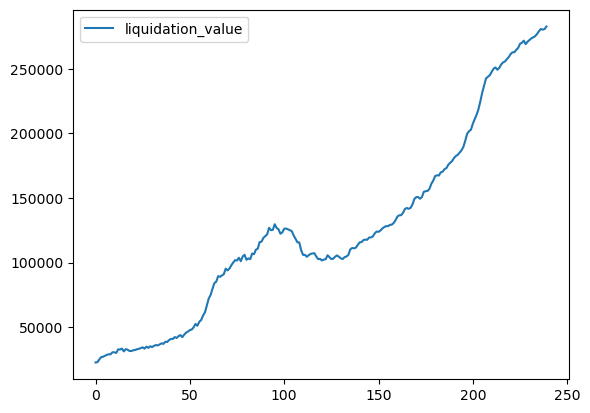

In [ ]:
%matplotlib inline
df = Loans("2000-01-01", 60000, 40000, 10.0, 2.0, 12*20).calculate('even', True)
df[['liquidation_value']].plot()

In [ ]:
data = MyDataFetcher().fetch_data()

In [ ]:
data.decode("ISO-8859-1")

['"Mánuður";"Vísitala neysluverðs Ársbreyting, %"\r',
 '"2000M01";5.8\r',
 '"2000M02";5.6\r',
 '"2000M03";5.9\r',
 '"2000M04";6.0\r',
 '"2000M05";5.9\r',
 '"2000M06";5.5\r',
 '"2000M07";5.6\r',
 '"2000M08";4.7\r',
 '"2000M09";4.0\r',
 '"2000M10";4.2\r',
 '"2000M11";4.6\r',
 '"2000M12";4.2\r',
 '"2001M01";3.5\r',
 '"2001M02";4.1\r',
 '"2001M03";3.9\r',
 '"2001M04";4.5\r',
 '"2001M05";5.5\r',
 '"2001M06";6.8\r',
 '"2001M07";7.0\r',
 '"2001M08";7.9\r',
 '"2001M09";8.4\r',
 '"2001M10";8.0\r',
 '"2001M11";8.1\r',
 '"2001M12";8.6\r',
 '"2002M01";9.4\r',
 '"2002M02";8.9\r',
 '"2002M03";8.7\r',
 '"2002M04";7.5\r',
 '"2002M05";5.9\r',
 '"2002M06";4.8\r',
 '"2002M07";4.1\r',
 '"2002M08";3.2\r',
 '"2002M09";3.1\r',
 '"2002M10";2.9\r',
 '"2002M11";2.4\r',
 '"2002M12";2.0\r',
 '"2003M01";1.4\r',
 '"2003M02";1.5\r',
 '"2003M03";2.2\r',
 '"2003M04";2.3\r',
 '"2003M05";2.2\r',
 '"2003M06";1.8\r',
 '"2003M07";1.6\r',
 '"2003M08";2.0\r',
 '"2003M09";2.2\r',
 '"2003M10";2.2\r',
 '"2003M11";2.5\r',
 '"200

In [6]:


# Now, you can move/rename the file as needed using Python's built-in file operations

<selenium.webdriver.remote.webelement.WebElement (session="3355a8e9222669a1f1a7df70b5b449a1", element="614F0F28FF35E5CAD3989FB6E9829766_element_6")>


In [17]:

df

C:\Users\adamr\AppData\Local\Temp\ipykernel_23344\2101040876.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv("Meginvextir.csv", ";", usecols=[0, 3], decimal=",")


,date,rates
0,03.01.2007,13.30
1,04.01.2007,13.30
2,05.01.2007,13.30
3,08.01.2007,13.30
4,09.01.2007,13.30
...,...,...
4154,31.07.2023,8.75
4155,01.08.2023,8.75
4156,02.08.2023,8.75
4157,03.08.2023,8.75


C:\Users\adamr\AppData\Local\Temp\ipykernel_23344\1137528015.py:48: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv("Meginvextir.csv", ";", usecols=[0, 3], decimal=",")


Saving central_index data to cache.


,date,central_interest_rate
0,03.01.2007,13.30
1,04.01.2007,13.30
2,05.01.2007,13.30
3,08.01.2007,13.30
4,09.01.2007,13.30
...,...,...
4154,31.07.2023,8.75
4155,01.08.2023,8.75
4156,02.08.2023,8.75
4157,03.08.2023,8.75
